In [101]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import RegressionResults
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

In [102]:
# import the CSV, create the dataframe
revs_df = pd.read_csv('revs_data.csv')
revs_df['ppg'] = (3*revs_df['wins'] + revs_df['draws']) / (revs_df['wins'] + revs_df['draws'] + revs_df['losses'])
revs_df['home_ppg'] = (3*revs_df['home_wins'] + revs_df['home_draws']) / (revs_df['home_wins'] + revs_df['home_draws'] + revs_df['home_losses'])
revs_df['away_ppg'] = (3*revs_df['away_wins'] + revs_df['away_draws']) / (revs_df['away_wins'] + revs_df['away_draws'] + revs_df['away_losses'])

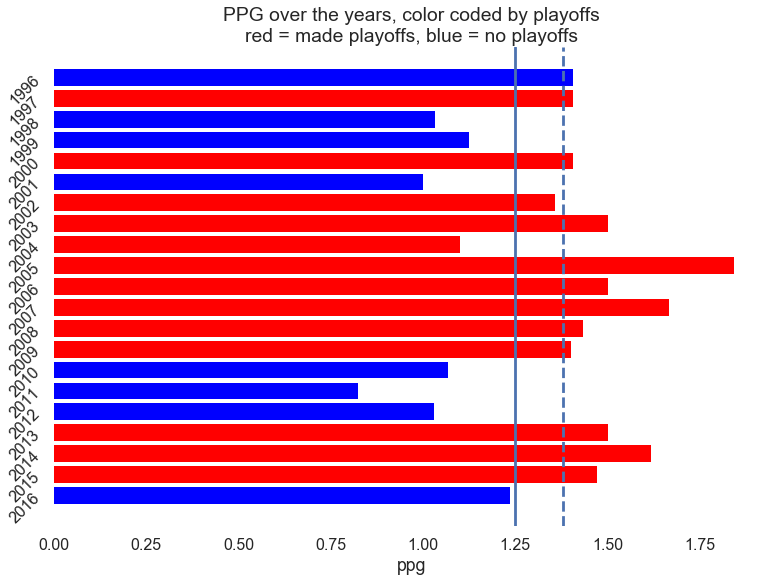

In [103]:
# scatter goal difference with ppg
with sns.plotting_context('poster'):
    ax = plt.gca()
    ax.barh(revs_df.year, revs_df.ppg, color = revs_df['playoffs'].apply(lambda x: colors[str(x)]))
    sns.despine(left=True,bottom=True)
    plt.grid(axis = 'x', color ='white', linestyle='-')
    ax.tick_params(axis='both', which='both',length=0)
    plt.yticks(range(1996, 2017), rotation=45)
    ax.axvline(1.25, label='ppg = 1.25')
    ax.axvline(1.38, linestyle='dashed', label='2017 Revs best case')
    plt.xlabel('ppg')
    plt.title('PPG over the years, color coded by playoffs\nred = made playoffs, blue = no playoffs')
    ax.invert_yaxis()

Above, I simply made a horizontal bar chart of points-per-game (ppg) by year. Red bars are years the Revs made the playoffs, blue bars are years they did not. Though the league format has certainly changed a lot (teams per conference, playoff format, etc.). I drew a line at 1.25 points per game (two draws and one win per 4 games) as a sort of magic line to cross; only once have the Revs ever made the playoffs with fewer PPG than 1.25, and only once have we missed with more (and that was 1996 so take it with a grain of salt). Currently, the Revs have 38 points from 31 games, which is about 1.23 PPG (doing this the day before the ATL game). 9 points from the last 3 would leave us at 47 from 34, or 1.38 ppg, where I've drawn a second line. 

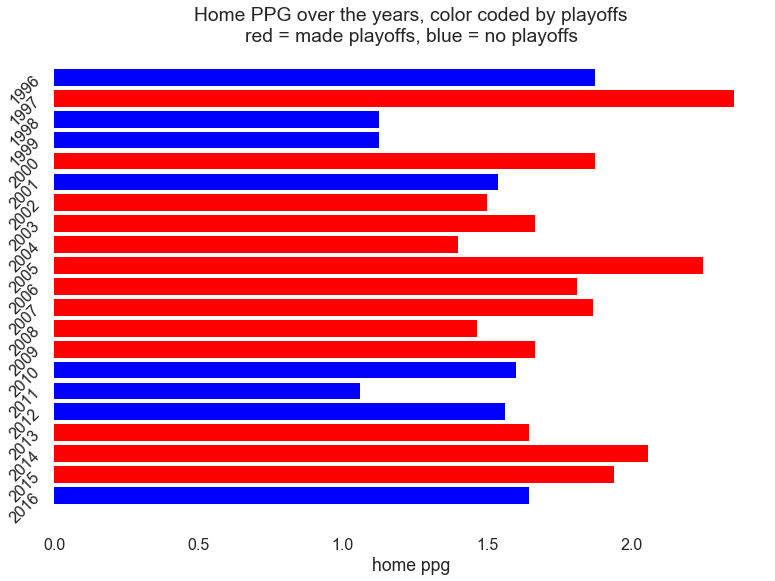

In [104]:
# scatter goal difference with ppg
with sns.plotting_context('poster'):
    ax = plt.gca()
    ax.barh(revs_df.year, revs_df.home_ppg, color = revs_df['playoffs'].apply(lambda x: colors[str(x)]))
    sns.despine(left=True,bottom=True)
    plt.grid(axis = 'x', color ='white', linestyle='-')
    ax.tick_params(axis='both', which='both',length=0)
    plt.yticks(range(1996, 2017), rotation=45)
    plt.xlabel('home ppg')
    plt.title('Home PPG over the years, color coded by playoffs\nred = made playoffs, blue = no playoffs')
    ax.invert_yaxis()

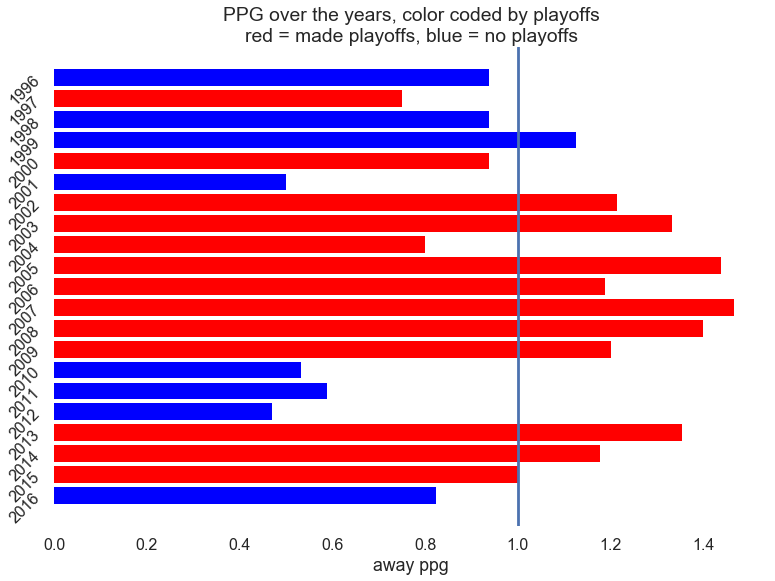

In [106]:
# scatter goal difference with ppg
with sns.plotting_context('poster'):
    ax = plt.gca()
    ax.barh(revs_df.year, revs_df.away_ppg, color = revs_df['playoffs'].apply(lambda x: colors[str(x)]))
    sns.despine(left=True,bottom=True)
    plt.grid(axis = 'x', color ='white', linestyle='-')
    ax.tick_params(axis='both', which='both',length=0)
    plt.yticks(range(1996, 2017), rotation=45)
    plt.xlabel('away ppg')
    ax.axvline(1)
    plt.title('PPG over the years, color coded by playoffs\nred = made playoffs, blue = no playoffs')
    ax.invert_yaxis()

Repeated the above analysis, but on home and away ppg. Didn't see much in home ppg, but since 2005 we have never made the playoffs with fewer than 1 point per away game. If the Revs win their final away game this year (as if...), they will have 6 points from 17 away games. So yeah.

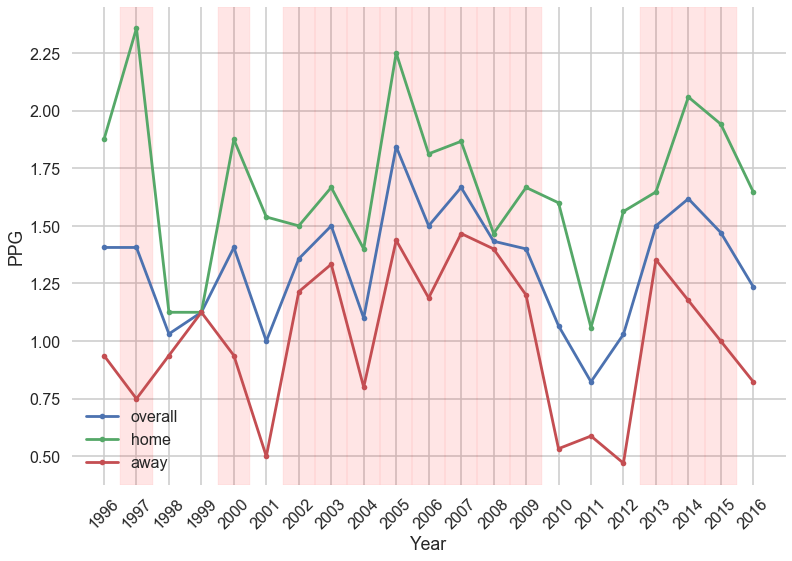

In [145]:
with sns.plotting_context('poster'):
    sns.set_style('whitegrid')
    plt.plot(revs_df.year, revs_df.ppg, '.-', label = 'overall')
    plt.plot(revs_df.year, revs_df.home_ppg, '.-', label = 'home',)
    plt.plot(revs_df.year, revs_df.away_ppg, '.-', label = 'away')
    plt.xticks(range(1996, 2017), rotation=45)
    plt.legend(loc='best')
    plt.xlabel("Year")
    plt.ylabel("PPG")
    for year in range(1996,2017):
        if (revs_df[(revs_df['year'] == year)]['playoffs'].values[0]) == 1:
            plt.axvspan(year - 0.5, year + 0.5, color='red', alpha=0.1)
    sns.despine(left=True, bottom=True)

Just a line graph of PPG - overall, home, and away - over time. Away PPG has never been higher than home PPG, byt the disparity has really been large over the last 3 years. Red highlighted areas are years that we made the playoffs.

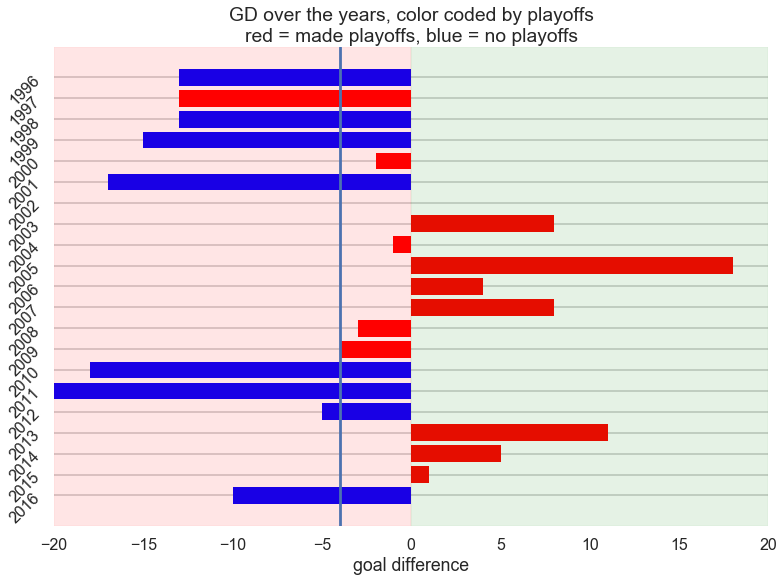

In [157]:
with sns.plotting_context('poster'):
    ax = plt.gca()
    ax.barh(revs_df.year, revs_df.gd, color = revs_df['playoffs'].apply(lambda x: colors[str(x)]))
    sns.despine(left=True,bottom=True)
    plt.grid(axis = 'x', color ='white', linestyle='-')
    ax.tick_params(axis='both', which='both',length=0)
    plt.xlim(-20,20)
    plt.yticks(range(1996, 2017), rotation=45)
    plt.xlabel('goal difference')
    plt.axvline(-4)
    plt.axvspan(-20, 0, color='red', alpha=0.1)
    plt.axvspan(20, 0, color='green', alpha=0.1)
    plt.title('GD over the years, color coded by playoffs\nred = made playoffs, blue = no playoffs')
    ax.invert_yaxis()

Looks like the magic number for goal difference is actually -4. Ignoring 1997, we have never missed the playoffs with a goal difference better than -4 and never made the playoffs with a goal difference worse than -4. Currently we sit at -10. If we win those last three though...

**Conclusions**
Based on this extremely rudimentary analysis, if the Revs win their final three games, history would point to them perhaps actually getting in.

_Note: I didn't want to run a regression because the league's composition and setup has changed so much over the years._